In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [326]:
df = pd.read_csv(r'diamonds.csv')

# Overview

In [327]:
df_dum = df # for model phase
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


1) price: price in US dollars (326 -- 18,823)  
2) carat: weight of the diamond (0.2--5.01)  
3) cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)  
4) color: diamond colour, from J (worst) to D (best)  
5) clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))  
6) x: length in mm (0--10.74)  
7) y: width in mm (0--58.9)  
8) z: depth in mm (0--31.8)  
9) depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  
10) table: width of top of diamond relative to widest point (43--95)  

# Organization of data

### Missing values

In [328]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

No missing values in this dataset

### Mapping categorial data

The features 'cut', 'color' and 'clarity' are categorial. Converting them imto numeric data can be useful

In [329]:
print('cut:',df.cut.unique())
print('color:',df.color.unique())
print('clarity:',df.clarity.unique())

cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [330]:
df['cut'] = df['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})
df['color'] = df['color'].map({'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0})
df['clarity']=df['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

In [331]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [332]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Analysis

In [351]:
size = ['x', 'y', 'z', 'depth', 'table']
quality =['carat', 'color', 'clarity','cut']

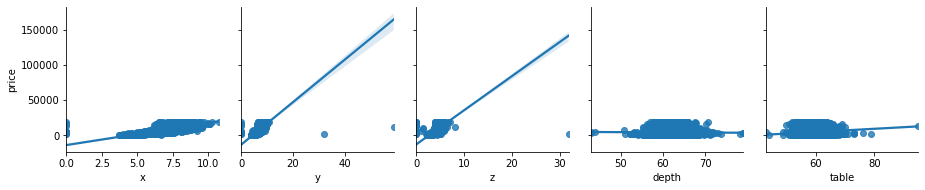

In [352]:
sns.pairplot(data=df, x_vars=size, y_vars='price', kind='reg')
plt.show()

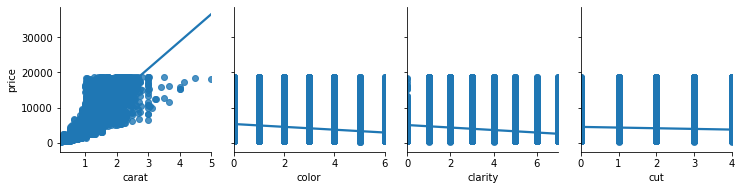

In [353]:
sns.pairplot(data=df, x_vars=quality, y_vars='price', kind='reg')
plt.show()

This is a regression visualization  
This visualisation is not very clear because of the regression function    
But, I can learn from this that there are some outlier diamonds  
For instance there are diamonds that are very underpriced but have huge y,z values  

I need to get rid of these outliers since they can mess up the regression models  
I'll cover each feature manually using scatter graphs for a better grip on the data

In [354]:
size = [df.x, df.y, df.z, df.depth, df.table]
quality =[df.carat, df.color, df.clarity, df.cut]

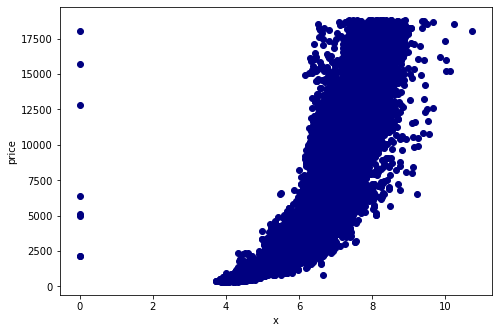

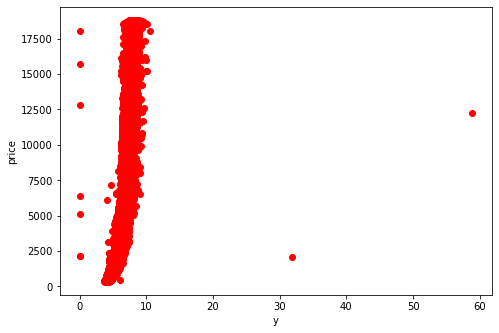

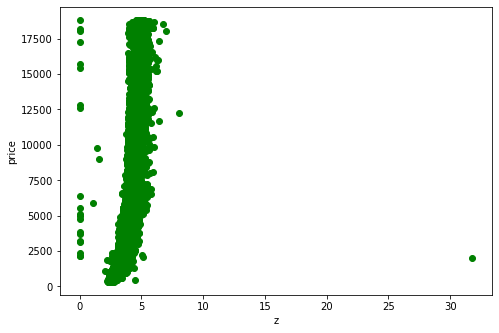

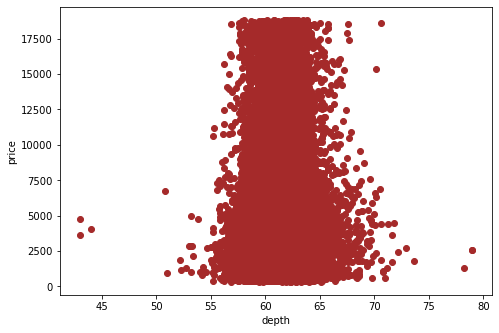

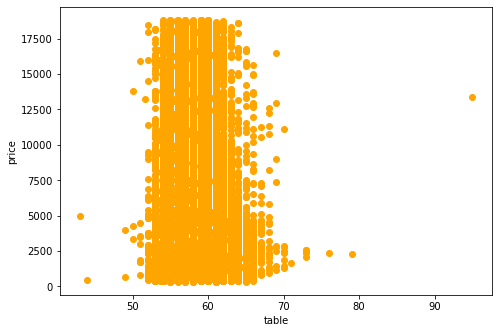

In [355]:
color=['navy','red','green','brown','orange']
for i,j in zip(size,color):
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    plt.scatter(i, df.price, color=j)
    plt.xlabel(i.name)
    plt.ylabel(df.price.name)

The size of a diamond have great influence on it's price  
The slope in each feature of x,y,z is very steep  
The price in depth and table may vary  

At first look its a bit strange that table which is a direct result of x,y,z does not affect the price much  
The explanation: depth = 2 * z / (x + y) which means that when x,y,z get higher values the ratio doesn't change much

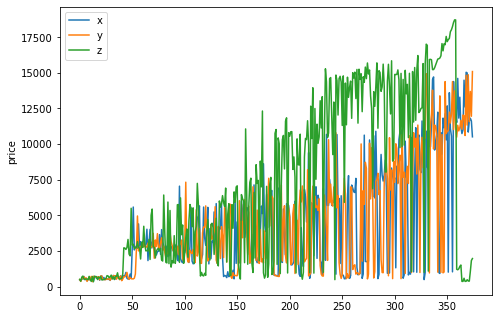

In [356]:
temp1=[]
temp2=[]
temp3=[]
for i,j,k in zip(df.x.unique(),df.y.unique(),df.z.unique()):
    temp1.append(df[df.x==i].price.mean())
    temp2.append(df[df.y==j].price.mean())
    temp3.append(df[df.z==k].price.mean())

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
plt.plot(temp1,label='x')
plt.plot(temp2,label='y')
plt.plot(temp3,label='z')
plt.ylabel('price')
plt.legend()

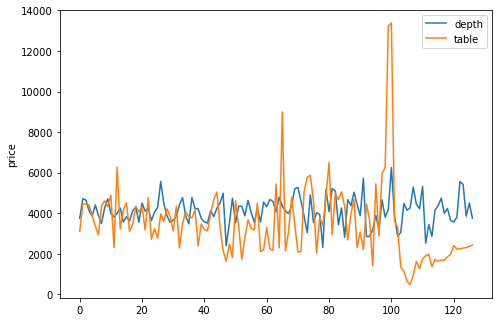

In [357]:
temp1=[]
temp2=[]
for i,j in zip(df.depth.unique(),df.table.unique()):
    temp1.append(df[df.depth==i].price.mean())
    temp2.append(df[df.table==j].price.mean())

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
plt.plot(temp1,label='depth')
plt.plot(temp2,label='table')
plt.ylabel('price')
plt.legend()

### x,y,z

What is the difference between x,y,z values that have the same price? (approximately)

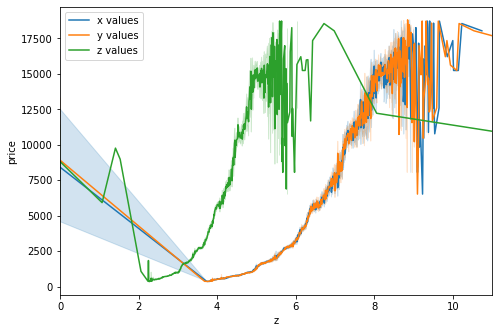

In [358]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
sns.lineplot(x=df.x, y=df.price, label='x values')
sns.lineplot(x=df.y, y=df.price, label='y values')
sns.lineplot(x=df.z, y=df.price, label='z values')
plt.xlim([0, 11])
plt.legend()

The difference between z and x,y is about 1.5-3.5mm, which means z has the biggest effect on the price

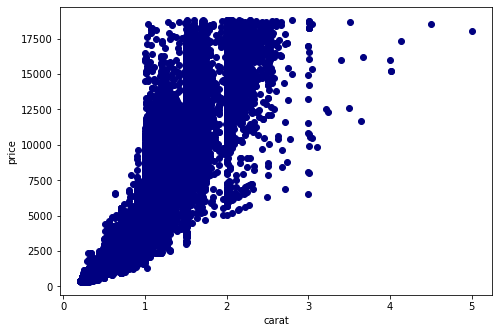

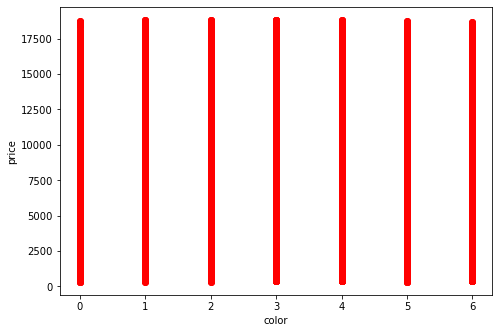

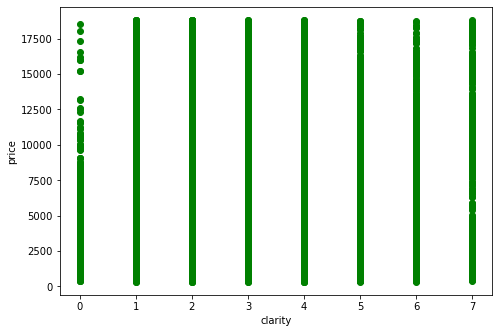

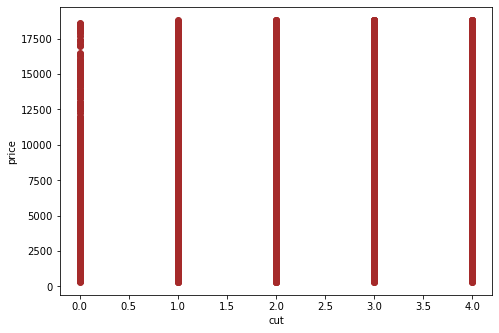

In [359]:
color=['navy','red','green', 'brown']
for i,j in zip(quality,color):
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    plt.scatter(i, df.price, color=j)
    plt.xlabel(i.name)
    plt.ylabel(df.price.name)

The last 3 looks almost like the regression graphs  
Looking back at the regression graphs, it seems that as the color and clarity get better, the price goes down(cut remains stable)  
Lets test that:

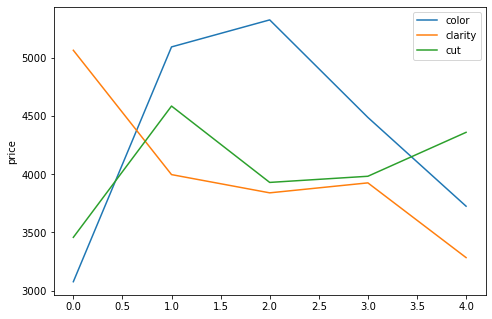

In [360]:
temp1=[]
temp2=[]
temp3=[]
for i,j,k in zip(df.color.unique(),df.clarity.unique(),df.cut.unique()):
    temp1.append(df[df.color==i].price.mean())
    temp2.append(df[df.clarity==j].price.mean())
    temp3.append(df[df.cut==k].price.mean())

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
plt.plot(temp1,label='color')
plt.plot(temp2,label='clarity')
plt.plot(temp3,label='cut')
plt.ylabel('price')
plt.legend()

Strange, but true

### Clarity

Explaination to why the clarity gets better but the price decreases:

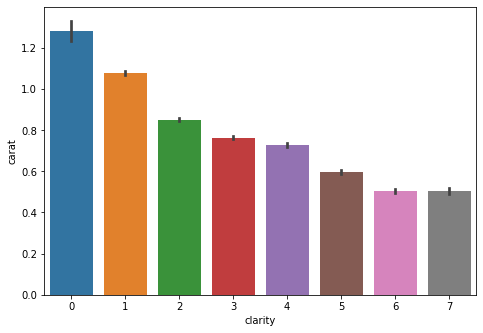

In [361]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
sns.barplot(x=df.clarity, y=df.carat)

According to the scatter and regression graphs of carat, more carat means higher price  
Since the carat decreases as the clarity gets better, we can conclude that it affects the price in a negative way   
Better clarity makes the price go down 

### Color

Explaination to why the color gets better but the price decreases:

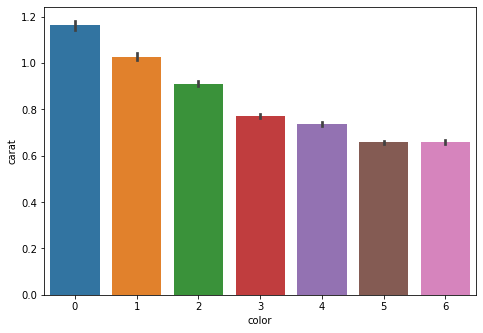

In [362]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
sns.barplot(x=df.color, y=df.carat)

Same explaination here

### Cut

I couldn't find an explanation to why the better the cut the higher the price

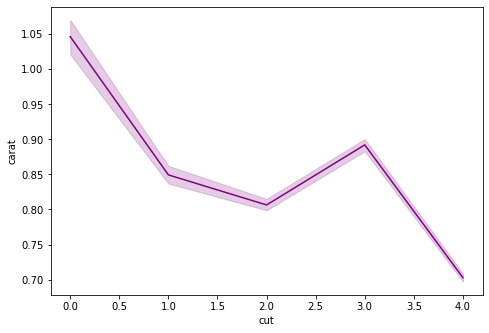

In [363]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
sns.lineplot(x=df.cut, y=df.carat, color='purple')

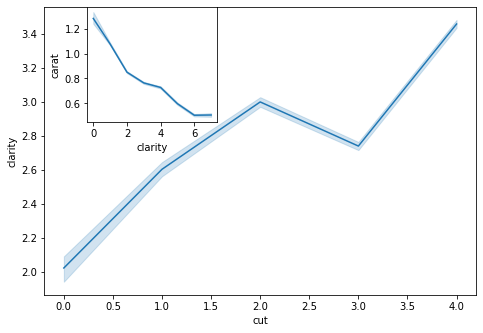

In [364]:
fig2 = plt.figure()
axes_main = fig2.add_axes([0,0,1,1])
sns.lineplot(x=df.cut, y=df.clarity)
axes_inset = fig2.add_axes([0.1,0.6,0.3,0.4])
sns.lineplot(x=df.clarity, y=df.carat)

# Data cleaning

Here, I'll clean the data from outliers and unnecessary features

Using the graphs from the analysis phase, lets clean the data from outliers:

In [333]:
df = df[df['x']>2]
df = df[df['y']<20]
df = df[df['y']>2]
df = df[df['z']<10]
df = df[df['z']>2]
df = df[df['depth']>50]
df = df[df['depth']<75]
df = df[df['table']>45]
df = df[df['table']<75]
df = df[df['carat']<=4]

# for model phase
df_dum = df_dum[df_dum['x']>2]
df_dum = df_dum[df_dum['y']<20]
df_dum = df_dum[df_dum['y']>2]
df_dum = df_dum[df_dum['z']<10]
df_dum = df_dum[df_dum['z']>2]
df_dum = df_dum[df_dum['depth']>50]
df_dum = df_dum[df_dum['depth']<75]
df_dum = df_dum[df_dum['table']>45]
df_dum = df_dum[df_dum['table']<75]
df_dum = df_dum[df_dum['carat']<=4]
# for model phase

In [334]:
df.shape

(53898, 11)

In [335]:
size = ['x', 'y', 'z', 'depth', 'table']
quality =['carat', 'color', 'clarity','cut']

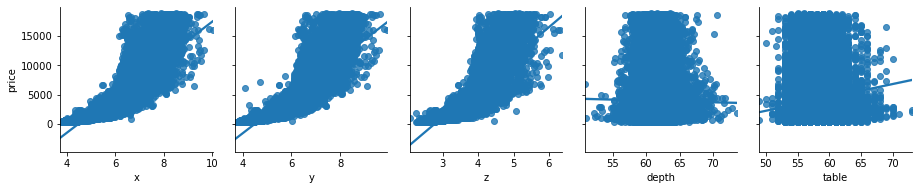

In [368]:
sns.pairplot(data=df, x_vars=size, y_vars='price', kind='reg')
plt.show()

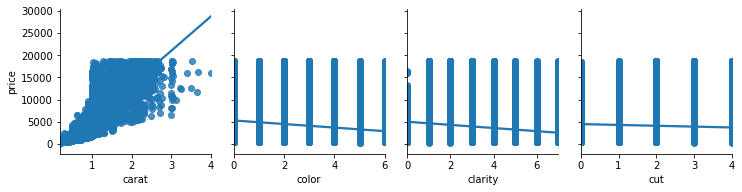

In [369]:
sns.pairplot(data=df, x_vars=quality, y_vars='price', kind='reg')
plt.show()

Much better

### Correlation heatmap

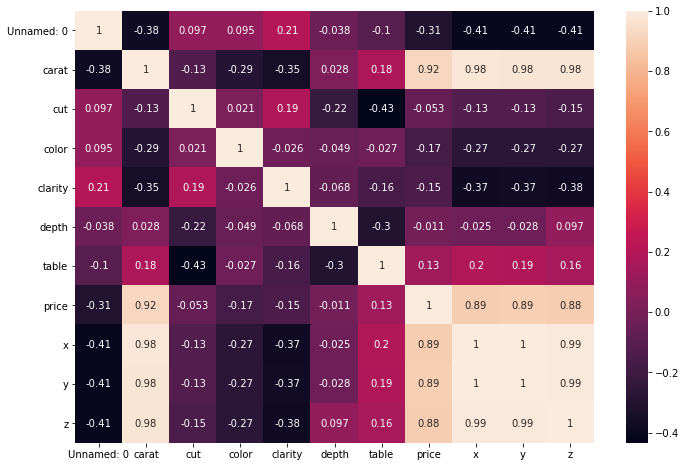

In [252]:
fig = plt.figure()
axes = fig.add_axes([0,0,1.5,1.5])
sns.heatmap(df.corr(),annot=True)

'Unnamed 0' is just another column of indexes so I can remove it safely:

In [336]:
df = df.drop('Unnamed: 0',axis=1)
df_dum = df_dum.drop('Unnamed: 0',axis=1)

In [337]:
df.shape

(53898, 10)

Ill use 2 datasets: regular and one with dummies for cut, color, clarity

In [338]:
df_dum = pd.get_dummies(data=df_dum, columns=['cut','color', 'clarity'])
df_dum.head()

,carat,depth,table,price,x,y,z,cut_0,cut_1,cut_2,...,color_5,color_6,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [339]:
df_dum.isnull().sum()

carat        0
depth        0
table        0
price        0
x            0
y            0
z            0
cut_0        0
cut_1        0
cut_2        0
cut_3        0
cut_4        0
color_0      0
color_1      0
color_2      0
color_3      0
color_4      0
color_5      0
color_6      0
clarity_0    0
clarity_1    0
clarity_2    0
clarity_3    0
clarity_4    0
clarity_5    0
clarity_6    0
clarity_7    0
dtype: int64

# Building the model

### The setup

In [340]:
X = df.drop('price',axis=1)
y = df.price
X_dum = df_dum.drop('price',axis=1)
y_dum = df_dum.price

In [341]:
print('regular:',X.shape,y.shape)
print('mini:',X_dum.shape,y_dum.shape)

regular: (53898, 9) (53898,)
mini: (53898, 26) (53898,)


In [342]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
X_dum_train,X_dum_test,y_dum_train,y_dum_test=train_test_split(X_dum,y_dum,test_size=0.2, random_state=42)

### Dummy

In [19]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)

In [20]:
print('MAE:',metrics.mean_absolute_error(y_test,pred_dummy))

MAE: 2973.481206153782


In [21]:
print('MSE:',metrics.mean_squared_error(y_test,pred_dummy))

MSE: 15171473.676329603


In [22]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_dummy)))

RMSE: 3895.057596022118


In [23]:
print('Score(R^2):',dummy.score(X_test,y_test))

Score(R^2): -0.0003777264943261027


### Linear Regression

#### Regular

In [24]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
pred_linreg = linreg.predict(X_test)

In [25]:
print('MAE:',metrics.mean_absolute_error(y_test,pred_linreg))

MAE: 780.3845747368304


In [26]:
print('MSE:',metrics.mean_squared_error(y_test,pred_linreg))

MSE: 1407310.4767866072


In [27]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_linreg)))

RMSE: 1186.3011745701879


In [28]:
print('Score(R^2):',linreg.score(X_test,y_test))

Score(R^2): 0.907204660188289


#### With dummies

In [29]:
linreg = LinearRegression()
linreg.fit(X_dum_train,y_dum_train)
pred_linreg = linreg.predict(X_dum_test)

In [30]:
print('MAE:',metrics.mean_absolute_error(y_dum_test,pred_linreg))

MAE: 714.056491245449


In [31]:
print('MSE:',metrics.mean_squared_error(y_dum_test,pred_linreg))

MSE: 1218319.2691227586


In [32]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_dum_test,pred_linreg)))

RMSE: 1103.7750083793158


In [33]:
print('Score(R^2):',linreg.score(X_dum_test,y_dum_test))

Score(R^2): 0.9196663760824512


### KNN

#### Regular

Maximum Score: 0.9535808258650408


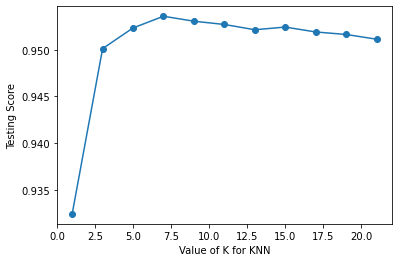

In [34]:
k_range = list(range(1, 22, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

Maximum Score: 0.9595695434523582


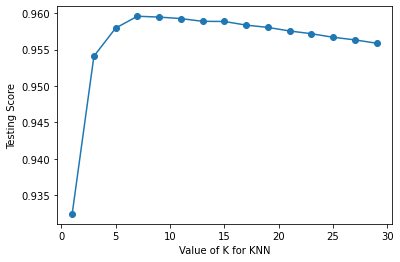

In [531]:
k_range = list(range(1, 31, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

Maximum Score: 0.9694952307876491


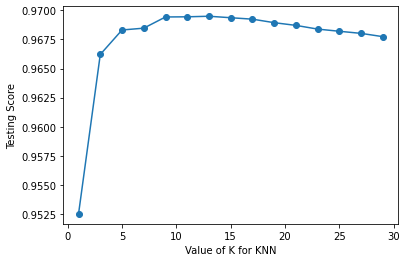

In [555]:
k_range = list(range(1, 31, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='manhattan')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

In [35]:
knn = KNeighborsRegressor(n_neighbors=13, weights='distance', metric='manhattan')
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [36]:
print('MAE:',metrics.mean_absolute_error(y_dum_test,pred_knn))

MAE: 344.65700881085104


In [37]:
print('MSE:',metrics.mean_squared_error(y_dum_test,pred_knn))

MSE: 462627.5564226248


In [38]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_dum_test,pred_knn)))

RMSE: 680.1673003185501


In [39]:
print('Score(R^2):',knn.score(X_test,y_test))

Score(R^2): 0.9694952307876491


#### With dummies

Maximum Score: 0.9421666302273172


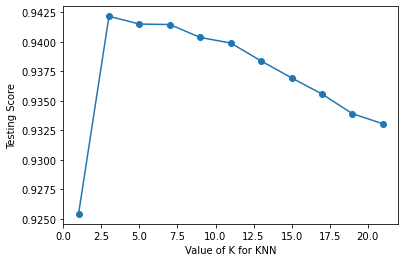

In [564]:
k_range = list(range(1, 22, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(X_dum_train,y_dum_train)
    pred = knn.predict(X_dum_test)
    scores.append(knn.score(X_dum_test, y_dum_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

Maximum Score: 0.9506113734562708


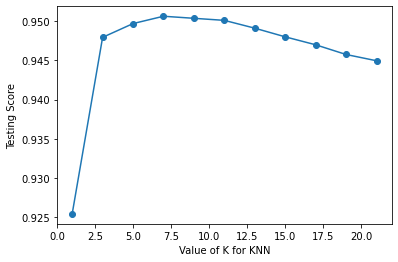

In [567]:
k_range = list(range(1, 22, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_dum_train,y_dum_train)
    pred = knn.predict(X_dum_test)
    scores.append(knn.score(X_dum_test, y_dum_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

Maximum Score: 0.96147749153478


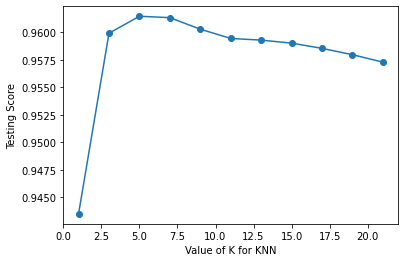

In [568]:
k_range = list(range(1, 22, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='manhattan')
    knn.fit(X_dum_train,y_dum_train)
    pred = knn.predict(X_dum_test)
    scores.append(knn.score(X_dum_test, y_dum_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

### Decision Tree

#### Regular

In [347]:
for i in [5,50,500,5000]:
    dtr = DecisionTreeRegressor(max_leaf_nodes=i, random_state=0)
    dtr.fit(X_train,y_train)
    #pred_dtr = dtr.predict(X_test)
    print(i,':', dtr.score(X_test,y_test))

5 : 0.8498717991612543
50 : 0.9570172270572805
500 : 0.9726837411490143
5000 : 0.9663332395373272


#### With dummies

In [348]:
for i in [5,50,500,5000]:
    dtr = DecisionTreeRegressor(max_leaf_nodes=i, random_state=0)
    dtr.fit(X_dum_train,y_dum_train)
    #pred_dtr = dtr.predict(X_dum_test)
    print(i,':', dtr.score(X_dum_test,y_dum_test))

5 : 0.8498717991612543
50 : 0.9507873513688627
500 : 0.9724656021336929
5000 : 0.9678928728121594


# Best Model

In [363]:
dtr = DecisionTreeRegressor(max_leaf_nodes=500, random_state=0)
dtr.fit(X_train,y_train)
pred_dtr = dtr.predict(X_test)

In [364]:
print('MAE:',metrics.mean_absolute_error(y_test,pred_dtr))

MAE: 350.26621552169723


In [365]:
print('MSE:',metrics.mean_squared_error(y_dum_test,pred_dtr))

MSE: 414271.4208020553


In [366]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_dum_test,pred_dtr)))

RMSE: 643.6392007965761


In [367]:
print('Score(R^2):',dtr.score(X_test,y_test))

Score(R^2): 0.9726837411490143
